ANIL VERCRUYSSE DSA ASSIGNMENT II

Student ID: 22202474

Note: This assignment was completed individually

Please refer to the accompanying PDF file for photos of the work on paper. 

Part I - Tasks I, II, III

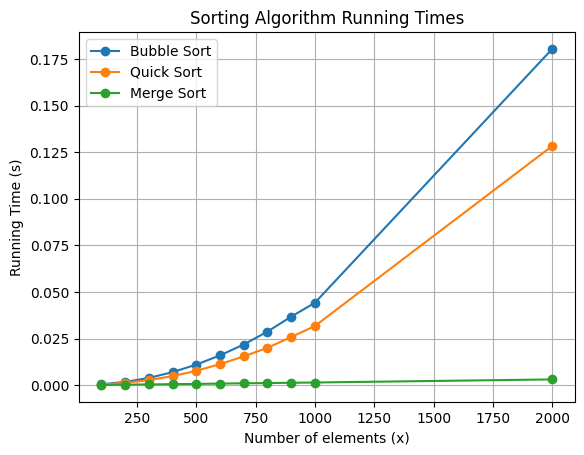

x: 2000
Average Bubble Sort time: 0.18035314666666788
Average Quick Sort time: 0.12830757333332865
Average Merge Sort time: 0.003090473333334861




In [3]:
import time
import matplotlib.pyplot as plt

# (i) Implementation of the three sorting algorithms

# Python implementation of bubblesort
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

# Python implementation of Quicksort.
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot


def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)

# Merge sort implemented in Python
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

def run_sorting_algorithms(algorithm, data):
    start = time.perf_counter()
    algorithm(data)
    end = time.perf_counter()
    return end - start

# (ii) create List inputs for the algorithm
x_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]
bubble_times = []
quick_times = []
merge_times = []

# repeat process 15 times to get average data
num_repeats = 15

# reverse the list for input
for x in x_values:
    data = list(reversed(range(x)))

    bubble_total_time = 0
    quick_total_time = 0
    merge_total_time = 0

    for _ in range(num_repeats):
        bubble_data = data.copy()
        quick_data = data.copy()
        merge_data = data.copy()

        bubble_total_time += run_sorting_algorithms(bubble_sort, bubble_data)
        quick_total_time += run_sorting_algorithms(quicksort, quick_data)
        merge_total_time += run_sorting_algorithms(mergesort, merge_data)

    bubble_times.append(bubble_total_time / num_repeats)
    quick_times.append(quick_total_time / num_repeats)
    merge_times.append(merge_total_time / num_repeats)


# (iii) Plot running times
plt.plot(x_values, bubble_times, label="Bubble Sort", marker="o")
plt.plot(x_values, quick_times, label="Quick Sort", marker="o")
plt.plot(x_values, merge_times, label="Merge Sort", marker="o")

plt.xlabel("Number of elements (x)")
plt.ylabel("Running Time (s)")
plt.legend()
plt.title("Sorting Algorithm Running Times")
plt.grid()
plt.savefig("sorting_algorithms_running_times.png")
plt.show()

print(f"x: {x}")
print(f"Average Bubble Sort time: {bubble_times[-1]}")
print(f"Average Quick Sort time: {quick_times[-1]}")
print(f"Average Merge Sort time: {merge_times[-1]}")
print("\n")

<pre>

Part I - Discussion Report

Introduction

In this exercise, I analysed and compared the performance of three sorting algorithms: Bubble sort, Quick sort, and Merge sort. These algorithms were implemented with Python, based on the code provided in the labs. The goal of this analysis is to measure their respective running times when sorting lists of various sizes, in order to compare their performance in terms of time complexity. The reader should note that the input lists were initially sorted in reverse (descending) order before running the sorting algorithms. 

Results discussion and pseudo code illustration

(i) Bubble sort

As expected, the results of the sorting algorithms highlight the differences in their time complexities. When sorting a list of 2000 elements, Bubble sort took an average time of 0.1804 seconds. Its average and worst time complexity of O(n^2) is the slowest among the algorithms compared, and its performance worsens as the number of elements in the list increases. This explains why it had the worst performance.

bubbleSort(A):
    n = length(A)
    for i = 0 to n-1:
        for j = 0 to n-i-1:
            if A[j] > A[j+1]:
                swap(A[j], A[j+1])
                
The outer loop runs n-1 times, and the inner loop runs n-i-1 times, giving a time complexity of O(n^2).

(ii) Quick sort

Quick sort, with an average time of 0.1283 seconds, performed slightly better than Bubble sort but followed a similar pattern of growth. This is likely due to the worst-case time complexity of Quick sort being O(n^2). However, it is important to note that Quick sort's average-case time complexity is O(nlog(n)), which typically makes it faster in practice and explains why it performed better than Bubble sort.

quickSort(A, low, high):
    if low < high:
        pivot = partition(A, low, high)
        quickSort(A, low, pivot-1)
        quickSort(A, pivot+1, high)
        
partition(A, low, high):
    pivot = A[high]
    i = low - 1
    for j = low to high-1:
        if A[j] < pivot:
            i = i + 1
            swap(A[i], A[j])
    swap(A[i+1], A[high])
    return i+1

The time complexity of Quick Sort depends on the partitioning step, which divides the list into two sublists around a pivot element. In the worst case, when the pivot is chosen as the smallest or largest element of the sublist, the time complexity is O(n^2). However, in the average case, the time complexity is O(nlog(n)).

(iii) Merge sort

Lastly, Merge sort was found to be the fastest algorithm in the comparison, taking an average time of 0.0031 seconds. Its time complexity of O(nlog(n)) (in all cases) means that its running time increases very slowly as the list size grows, making it the most suitable algorithm for sorting larger lists. The graph shows that Merge sort's performance is consistently better than that of Quick sort and Bubble sort for all tested list sizes, which shows that it is the optimal choice for sorting larger lists.

mergeSort(A):
    if length(A) > 1:
        mid = length(A) / 2
        left = A[0:mid]
        right = A[mid:]
        mergeSort(left)
        mergeSort(right)
        i = j = k = 0
        while i < length(left) and j < length(right):
            if left[i] < right[j]:
                A[k] = left[i]
                i += 1
            else:
                A[k] = right[j]
                j += 1
            k += 1
        while i < length(left):
            A[k] = left[i]
            i += 1
            k += 1
        while j < length(right):
            A[k] = right[j]
            j += 1
            k += 1
            
The Merge Sort algorithm divides the list into two sublists recursively until each sublist contains only one element. Then, it merges the sublists in sorted order. The time complexity of Merge Sort is O(nlog(n)) because each level of the recursion involves dividing the list into two sublists, and there are log(n) levels. 

Conclusion

In conclusion, the comparison of Bubble sort, Quick sort, and Merge sort demonstrates the impact of time complexity on the performance of sorting algorithms. Bubble sort, with its O(n^2) time complexity, performs poorly for larger lists, whereas Merge sort, with its O(nlog(n)) time complexity, consistently outperforms the other two algorithms.

While Quick sort's worst-case time complexity is O(n^2), its average-case time complexity of O(nlog(n)) makes it faster in practice. However, Merge sort remains the optimal choice for sorting larger lists as indicated by its consistently better performance. These findings highlight the importance of analysing the time complexity and characteristics of various candidate algorithms when selecting one for a given problem. 
            
            
Sources: 
- Palui, S., & Gupta, S. (2014). An Unique Sorting Algorithm With Linear Time Complexity.
- https://web.stanford.edu/class/archive/cs/cs106b/cs106b.1206/lectures/big-o/
- https://www.mygreatlearning.com/blog/merge-sort/
- https://www.mygreatlearning.com/blog/bubble-sort/
- https://www.mygreatlearning.com/blog/quick-sort-algorithm/

</pre>

Part II - Task I to V (see accompanying PDF file for the pen and paper work)

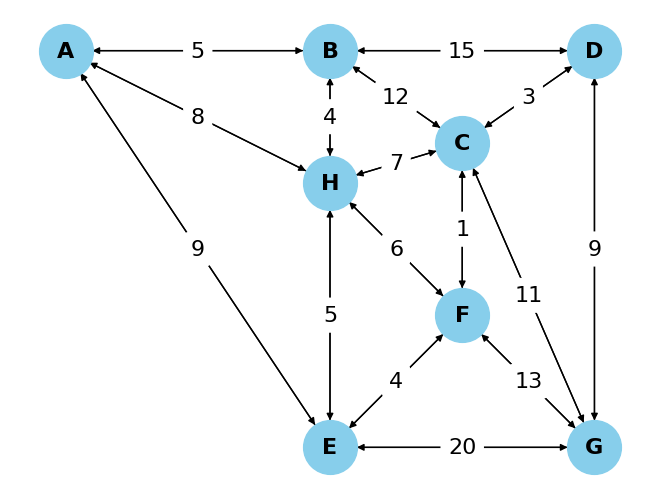

Shortest path from A to A: ['A'], distance: 0
Shortest path from A to B: ['A', 'B'], distance: 5
Shortest path from A to H: ['A', 'H'], distance: 8
Shortest path from A to E: ['A', 'E'], distance: 9
Shortest path from A to D: ['A', 'E', 'F', 'C', 'D'], distance: 17
Shortest path from A to C: ['A', 'E', 'F', 'C'], distance: 14
Shortest path from A to F: ['A', 'E', 'F'], distance: 13
Shortest path from A to G: ['A', 'E', 'F', 'C', 'G'], distance: 25


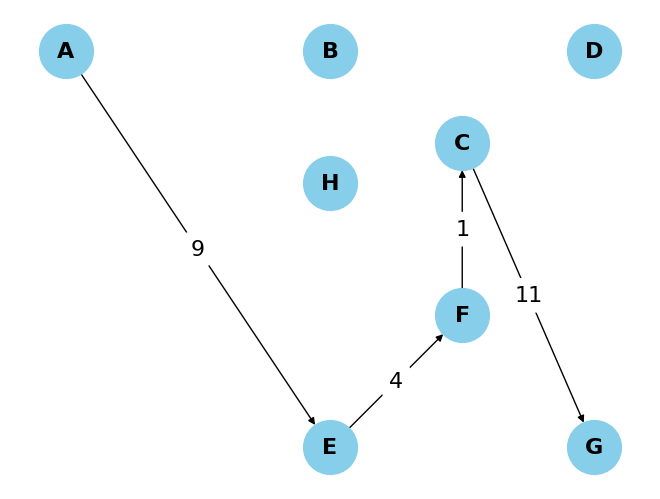

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

# (i) create an empty weighted graph, G
G = nx.DiGraph()

# (ii) Add vertices (nodes) with the weights given in figure 1 to G
edges = [
    ("A", "B", 5), ("A", "H", 8), ("A", "E", 9),
    ("B", "A", 5), ("B", "D", 15), ("B", "C", 12), ("B", "H", 4),
    ("C", "B", 12), ("C", "H", 7), ("C", "F", 1), ("C", "G", 11), ("C", "D", 3),
    ("D", "B", 15), ("D", "C", 3), ("D", "G", 9),
    ("E", "A", 9), ("E", "H", 5), ("E", "F", 4), ("E", "G", 20),
    ("F", "E", 4), ("F", "H", 6), ("F", "C", 1), ("F", "G", 13),
    ("G", "D", 9), ("G", "C", 11), ("G", "F", 13), ("G", "E", 20),
    ("H", "A", 8), ("H", "B", 4), ("H", "C", 7), ("H", "E", 5), ("H", "F", 6)
]

G.add_weighted_edges_from(edges)

# Manually specify the positions of the nodes for readability
pos = {"A": (0, 3), "B": (1, 3), "D": (2, 3),
       "H": (1, 2), "C": (1.5, 2.3),  
       "F": (1.5, 1),
       "E": (1, 0), "G": (2, 0)}

# (iii) Draw graph G
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=16, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=16, rotate=False)

plt.axis("off")
plt.show()

# (iv) Compute shortest paths and distances
shortest_paths = {v: nx.shortest_path(G, "A", v, weight="weight") for v in G.nodes}
shortest_distances = {v: nx.shortest_path_length(G, "A", v, weight="weight") for v in G.nodes}

# Print shortest paths
for v in G.nodes:
    print(f"Shortest path from A to {v}: {shortest_paths[v]}, distance: {shortest_distances[v]}")

# (v) Draw the shortest path tree without unwanted edges
T = nx.DiGraph()
T.add_nodes_from(G.nodes)
tree_edges = [(u, v, G[u][v]["weight"]) for u, v in zip(shortest_paths["G"], shortest_paths["G"][1:])]
T.add_weighted_edges_from(tree_edges)

nx.draw(T, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=16, font_weight="bold")
tree_labels = nx.get_edge_attributes(T, "weight")
nx.draw_networkx_edge_labels(T, pos, edge_labels=tree_labels, font_size=16, rotate=False)

plt.axis("off")
plt.show()

<pre>

Part II - Discussion Report

Introduction

In this exercise, I applied Dijkstra's algorithm on a given directed weighted graph with the objective of finding the shortest path between source node A and destination node G. Dijkstra's algorithm is a graph algorithm that determines the shortest path from a source node to all other nodes in a graph with non-negative edge weights (it cannot be applied to graphs with negative edge weights). This section will discuss the application of this algorithm on the directed weighted graph and will present the results of my findings. 

Algorithm Application and Results

I applied Dijkstra's algorithm on the directed weighted graph to find the shortest path from node A to G on paper, and later confirmed my results with code. The algorithm works by iteratively selecting unvisited nodes at the smallest distance from the source node (here A), marking them as visited, and updating the distances and paths for neighbouring nodes. This process is repeated until all nodes are visited. The algorithm maintains a table with the visited status, distances, and paths for each node at each iteration.

The accompanying PDF file shows the paper and pen version of this exercise. The results I obtained after the last step (Step 8) of the algorithm are indicated on the below table, which shows that: every node has been visited (0 is unvisited, 1 is visited), the shortest distance to reach that node when starting at node A, and the shortest path to take to follow that shortest distance.

Node Visited Distance Path
   A       1        0    ['A']
   B       1        5    ['A', 'B']
   C       1        14   ['A', 'E', 'F', 'C']
   D       1        17   ['A', 'E', 'F', 'C', 'D']
   E       1        9    ['A', 'E']
   F       1        13   ['A', 'E', 'F']
   G       1        25   ['A', 'E', 'F', 'C', 'G']
   H       1        8    ['A', 'H']

Based on the results of the algorithm's implementation, the shortest path from the source node A to the destination node G is ['A', 'E', 'F', 'C', 'G'] with a total distance of 25. The algorithm successfully provided the shortest paths and distances from the source node A to all other nodes in the graph.

Conclusion

The application of Dijkstra's algorithm on the directed weighted graph effectively determined the shortest paths and distances from the source node A to all other nodes, in particular the destination node G. The results demonstrate the effectiveness of Dijkstra's algorithm in solving shortest path problems on directed weighted graphs. An important limitation of the algorithm is that it cannot be applied to negative edge weights, since it assumes that all weights are non-negative. The findings of this exercise highlight the importance of choosing appropriate graph algorithms for solving specific problems in the domain of graph theory.

Sources: 

- https://web.stanford.edu/class/archive/cs/cs106b/cs106b.1186/lectures/24-Dijkstra_AStar/24-Dijkstra_AStar.pdf
- Javaid, A. (2013). Understanding Dijkstra's algorithm. Available at SSRN 2340905.
</pre>

Part III - Tasks I to V (see accompanying pdf for the pen and paper works)

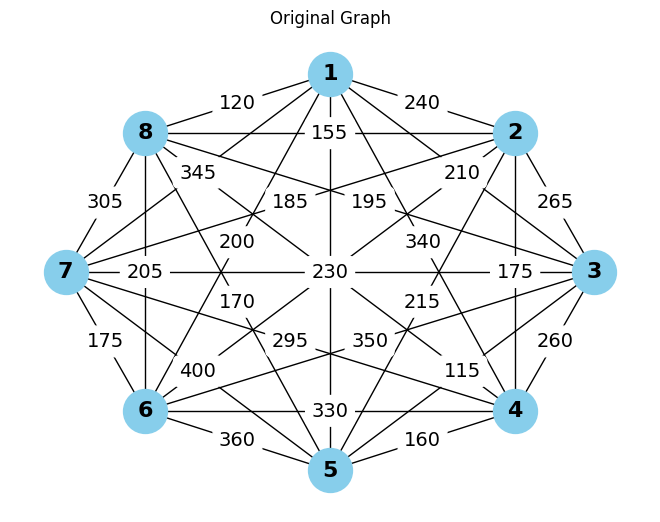

Minimum Spanning Tree (Prim's Algorithm):
1 - 8: 120
2 - 8: 155
2 - 6: 180
3 - 5: 115
4 - 5: 160
5 - 8: 170
6 - 7: 175


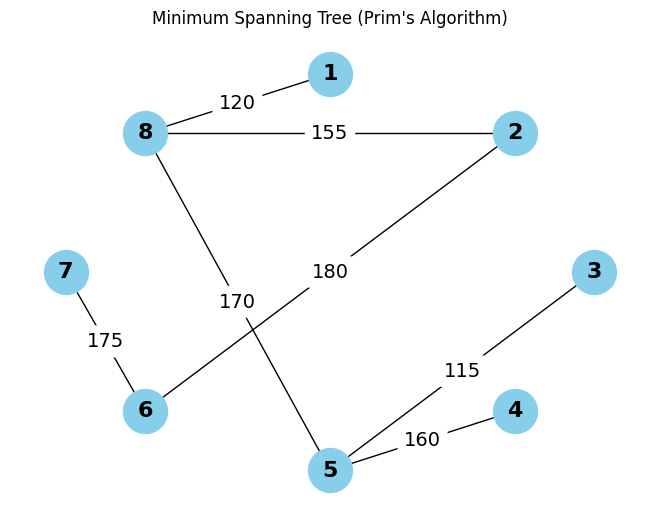

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

# (i) create an empty weighted graph
G = nx.Graph()

# (ii) add vertices (nodes) with their weights given in the given table to the graph
edges = [
    (1, 2, 240), (1, 3, 210), (1, 4, 340), (1, 5, 280), (1, 6, 200), (1, 7, 345), (1, 8, 120),
    (2, 3, 265), (2, 4, 175), (2, 5, 215), (2, 6, 180), (2, 7, 185), (2, 8, 155),
    (3, 4, 260), (3, 5, 115), (3, 6, 350), (3, 7, 435), (3, 8, 195),
    (4, 5, 160), (4, 6, 330), (4, 7, 295), (4, 8, 230),
    (5, 6, 360), (5, 7, 400), (5, 8, 170),
    (6, 7, 175), (6, 8, 205),
    (7, 8, 305)
]

G.add_weighted_edges_from(edges)

# (iii) Set up the positions of the nodes
pos = {1: (0, 1), 2: (0.7, 0.7), 3: (1, 0), 4: (0.7, -0.7),
       5: (0, -1), 6: (-0.7, -0.7), 7: (-1, 0), 8: (-0.7, 0.7)}


# (iii) Draw the original graph
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=16, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=14, rotate=False)

plt.axis("off")
plt.title("Original Graph")
plt.show()

# (iv) Compute the minimum spanning tree using Prim's algorithm
mst = nx.minimum_spanning_tree(G, algorithm="prim")

# (iv) Print the minimum spanning tree
mst_edges = list(mst.edges(data=True))
print("Minimum Spanning Tree (Prim's Algorithm):")
for edge in mst_edges:
    print(f"{edge[0]} - {edge[1]}: {edge[2]['weight']}")

# (v) Draw the minimum spanning tree
pos_mst = pos
nx.draw(mst, pos_mst, with_labels=True, node_size=1000, node_color="skyblue", font_size=16, font_weight="bold")
mst_labels = nx.get_edge_attributes(mst, "weight")
nx.draw_networkx_edge_labels(mst, pos_mst, edge_labels=mst_labels, font_size=14, rotate=False)

plt.axis("off")
plt.title("Minimum Spanning Tree (Prim's Algorithm)")
plt.show()

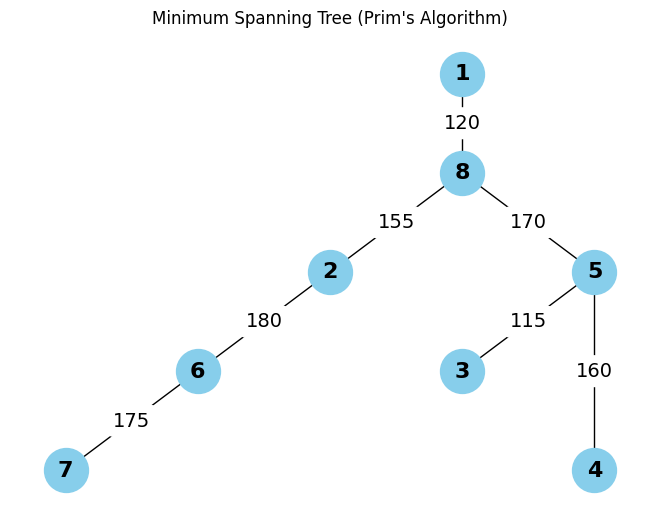

In [68]:
# (v) Draw the minimum spanning tree (additional format)
pos_mst = {1: (0, 1), 8: (0, 0.5), 2: (-0.5, 0), 5: (0.5, 0), 6: (-1, -0.5), 7: (-1.5, -1), 3: (0, -0.5), 4: (0.5, -1)}
nx.draw(mst, pos_mst, with_labels=True, node_size=1000, node_color="skyblue", font_size=16, font_weight="bold")
mst_labels = nx.get_edge_attributes(mst, "weight")
nx.draw_networkx_edge_labels(mst, pos_mst, edge_labels=mst_labels, font_size=14, rotate=False)

plt.axis("off")
plt.title("Minimum Spanning Tree (Prim's Algorithm)")
plt.show()

<pre>
Part III - Discussion Report

Introduction

In this exercise, I applied Prim's algorithm on a given undirected weighted graph representing the distances between eight islands, where the edge weights represent the distance between each node. The objective was to find the Minimum Spanning Tree (MST) that connects all islands with the minimum total construction cost. Prim's algorithm is a graph algorithm that constructs a MST by iteratively selecting the edge with the minimum weight that connects a visited node to an unvisited node. This section will discuss the application of this algorithm on the graph and will present the results of my findings.

Algorithm Application and Results

I applied Prim's algorithm on the undirected weighted graph to find the MST connecting all islands with minimum construction cost. As explained in the instructions, the algorithm is implemented with Node 1 as the root node, and the cost of constructing a bridge should be understood as proportional to its length.  Prim's algorithm works by iteratively selecting the edge with the minimum weight connecting a visited node to an unvisited node, marking the unvisited node as visited, and including the edge in the MST. The algorithm maintains a list of visited nodes, a priority queue for the edges, and a set of selected edges. The priority queue stores the edges in ascending order of their weights, ensuring efficient selection of the edge with the minimum weight connecting a visited node to an unvisited node.

The algorithm iterates until all nodes have been visited or the priority queue becomes empty, indicating that the minimum spanning tree has been found or that there are no more edges to consider.

After implementing the algorithm steps A to G (see full details in the accompanying PDF file), the Minimum Spanning Tree Edges were identified as being [(1, 8, 120), (8, 2, 155), (8, 5, 170), (5, 3, 115), (5, 4, 160), (2, 6, 180), (6, 7, 175)], resulting in a total construction cost of 1075.

The MST connecting all the islands is as follows:

Connect Island 1 to Island 8 with a cost of 120
Connect Island 8 to Island 2 with a cost of 155
Connect Island 8 to Island 5 with a cost of 170
Connect Island 5 to Island 3 with a cost of 115
Connect Island 5 to Island 4 with a cost of 160
Connect Island 2 to Island 6 with a cost of 180
Connect Island 6 to Island 7 with a cost of 175

By connecting the islands in this way, the state can minimise the total cost of bridge construction while ensuring that all islands are reachable from one another.

Conclusion

The application of Prim's algorithm on the undirected weighted graph effectively determined the Minimum Spanning Tree that connects all eight islands with the minimum total construction cost. The results demonstrate the effectiveness of Prim's algorithm in solving MST problems on undirected weighted graphs. It should be noted that Prim's algorithm does present limitations, for instance it requires the graph to be connected and undirected, and it assumes that edge weights are unique. In cases where edge weights are not unique, tie-breaking rules may be needed to implement the algorithm. The findings of this exercise further demonstrate the importance of choosing appropriate graph algorithms for solving specific problems in the domain of graph theory.


Sources: 

- Prim, R. C. (1957). Shortest connection networks and some generalizations. The Bell System Technical Journal, 36(6), 1389-1401.
- https://web.stanford.edu/class/archive/cs/cs161/cs161.1138/lectures/14/Small14.pdf

</pre>